##### Task 1: Data Preprocessing for Portfolio Management

This notebook demonstrates comprehensive data preprocessing for TSLA, BND, and SPY financial data including:
 - Data loading and cleaning
 - Missing data handling
 - Outlier detection
 - Statistical analysis
 - ADF stationarity tests

In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

##### 1. Data Loading

In [17]:
# Define parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2024-01-01'

# Fetch data
print("Fetching financial data...")
data = yf.download(tickers, start=start_date, end=end_date)

print(f"Data shape: {data.shape}")
print(f"Date range: {data.index[0]} to {data.index[-1]}")
data.head()

Fetching financial data...


[*********************100%***********************]  3 of 3 completed

Data shape: (2264, 15)
Date range: 2015-01-02 00:00:00 to 2023-12-29 00:00:00


Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-01-02  61.378365  171.568024  14.620667  61.408070  172.779024   
2015-01-05  61.556595  168.469589  14.006000  61.578873  170.682773   
2015-01-06  61.734821  166.882767  14.085333  61.920479  169.304741   
2015-01-07  61.771965  168.962311  14.063333  61.846227  169.304732   
2015-01-08  61.675434  171.960556  14.041333  61.719990  172.177707   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-01-02  14.883333  61.207557  170.524067  14.217333  61.214985   
2015-01-05  14.433333  61.415493  168.160582  13.810667  61.445199   
2015-01-06  14.280000  61.660559  166.081002  13.614000  61.660559   
2015-01-07  14.318667  61.675425  167.768030  13.985333  61.742259   
2015-01-08  14.253333  61.616022  170.365400  14.000667  61.719990   

Price                               Volume                       
Ticker             SPY       TSLA      BND        SPY      TSLA  
Date                                                             
2015-01-02  172.361441  14.858000  2218800  121465900  71466000  
2015-01-05  170.515742  14.303333  5820100  169632600  80527500  
2015-01-06  168.778583  14.004000  3887600  209151400  93928500  
2015-01-07  168.219014  14.223333  2433400  125346700  44526000  
2015-01-08  170.382094  14.187333  1873400  147217800  51637500

##### 2. Data Quality Assessment

In [18]:
# Check for missing values
print("Missing values per column:")
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

# Data info
print("\nData Info:")
data.info()

Missing values per column:
Series([], dtype: int64)

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, BND)    2264 non-null   float64
 1   (Close, SPY)    2264 non-null   float64
 2   (Close, TSLA)   2264 non-null   float64
 3   (High, BND)     2264 non-null   float64
 4   (High, SPY)     2264 non-null   float64
 5   (High, TSLA)    2264 non-null   float64
 6   (Low, BND)      2264 non-null   float64
 7   (Low, SPY)      2264 non-null   float64
 8   (Low, TSLA)     2264 non-null   float64
 9   (Open, BND)     2264 non-null   float64
 10  (Open, SPY)     2264 non-null   float64
 11  (Open, TSLA)    2264 non-null   float64
 12  (Volume, BND)   2264 non-null   int64  
 13  (Volume, SPY)   2264 non-null   int64  
 14  (Volume, TSLA)  2264 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 28

##### 3. Advanced Data Cleaning

In [19]:
def clean_financial_data(data, method='advanced'):
    """
    Advanced data cleaning with multiple strategies
    """
    cleaned_data = data.copy()
    
    # Remove rows with all NaN values
    cleaned_data = cleaned_data.dropna(how='all')
    
    if method == 'advanced':
        # Forward fill, backward fill, then interpolate
        cleaned_data = cleaned_data.fillna(method='ffill')
        cleaned_data = cleaned_data.fillna(method='bfill')
        cleaned_data = cleaned_data.interpolate(method='time')
    
    # Remove any remaining NaN values
    cleaned_data = cleaned_data.dropna()
    
    return cleaned_data

# Clean the data
cleaned_data = clean_financial_data(data, method='advanced')
print(f"Cleaned data shape: {cleaned_data.shape}")
print(f"Missing values after cleaning: {cleaned_data.isnull().sum().sum()}")

Cleaned data shape: (2264, 15)
Missing values after cleaning: 0


##### 4. Extract Close Prices and Calculate Returns

In [20]:
# Extract close prices
close_prices = cleaned_data['Close']
print("Close prices shape:", close_prices.shape)

# Calculate daily returns (log returns)
returns = np.log(close_prices / close_prices.shift(1)).dropna()
print("Returns shape:", returns.shape)

# Display basic statistics
print("\nReturns Summary Statistics:")
print(returns.describe())

Close prices shape: (2264, 3)
Returns shape: (2263, 3)

Returns Summary Statistics:
Ticker          BND          SPY         TSLA
count   2263.000000  2263.000000  2263.000000
mean       0.000054     0.000442     0.001252
std        0.003440     0.011439     0.035513
min       -0.055920    -0.115887    -0.236518
25%       -0.001455    -0.003800    -0.015528
50%        0.000123     0.000555     0.001261
75%        0.001667     0.005923     0.018819
max        0.041335     0.086731     0.181445


##### 5. Outlier Detection

In [21]:
def detect_outliers(series, method='iqr'):
    """
    Detect outliers using IQR or Z-score method
    """
    if method == 'iqr':
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (series < lower_bound) | (series > upper_bound)
    elif method == 'zscore':
        z_scores = np.abs(stats.zscore(series.dropna()))
        outliers = pd.Series(z_scores > 3, index=series.dropna().index)
        outliers = outliers.reindex(series.index, fill_value=False)
    
    return outliers

# Detect outliers for each asset
print("Outlier Detection Results:")
for ticker in tickers:
    outliers = detect_outliers(returns[ticker], method='iqr')
    print(f"{ticker}: {outliers.sum()} outliers detected ({outliers.sum()/len(returns)*100:.2f}%)")

Outlier Detection Results:
TSLA: 143 outliers detected (6.32%)
BND: 116 outliers detected (5.13%)
SPY: 153 outliers detected (6.76%)


##### 6. ADF Stationarity Tests

In [22]:
def adf_test(series, name):
    """
    Perform Augmented Dickey-Fuller test for stationarity
    """
    result = adfuller(series.dropna(), autolag='AIC')
    
    print(f"\nADF Test Results for {name}:")
    print(f"ADF Statistic: {result[0]:.6f}")
    print(f"P-value: {result[1]:.6f}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.6f}")
    
    if result[1] <= 0.05:
        print(f"Result: {name} is STATIONARY (reject null hypothesis)")
    else:
        print(f"Result: {name} is NON-STATIONARY (fail to reject null hypothesis)")
    
    return result

# Test stationarity for prices and returns
print("=" * 60)
print("STATIONARITY ANALYSIS")
print("=" * 60)

# Test prices (should be non-stationary)
for ticker in tickers:
    adf_test(close_prices[ticker], f"{ticker} Prices")

print("\n" + "=" * 60)

# Test returns (should be stationary)
for ticker in tickers:
    adf_test(returns[ticker], f"{ticker} Returns")

STATIONARITY ANALYSIS

ADF Test Results for TSLA Prices:
ADF Statistic: -1.081571
P-value: 0.722365
Critical Values:
	1%: -3.433278
	5%: -2.862833
	10%: -2.567459
Result: TSLA Prices is NON-STATIONARY (fail to reject null hypothesis)

ADF Test Results for BND Prices:
ADF Statistic: -1.402714
P-value: 0.580974
Critical Values:
	1%: -3.433274
	5%: -2.862832
	10%: -2.567458
Result: BND Prices is NON-STATIONARY (fail to reject null hypothesis)

ADF Test Results for SPY Prices:
ADF Statistic: -0.194815
P-value: 0.939137
Critical Values:
	1%: -3.433256
	5%: -2.862824
	10%: -2.567453
Result: SPY Prices is NON-STATIONARY (fail to reject null hypothesis)


ADF Test Results for TSLA Returns:
ADF Statistic: -32.478200
P-value: 0.000000
Critical Values:
	1%: -3.433246
	5%: -2.862819
	10%: -2.567451
Result: TSLA Returns is STATIONARY (reject null hypothesis)

ADF Test Results for BND Returns:
ADF Statistic: -9.226491
P-value: 0.000000
Critical Values:
	1%: -3.433274
	5%: -2.862832
	10%: -2.567458
R

##### 7. Rolling Volatility Analysis

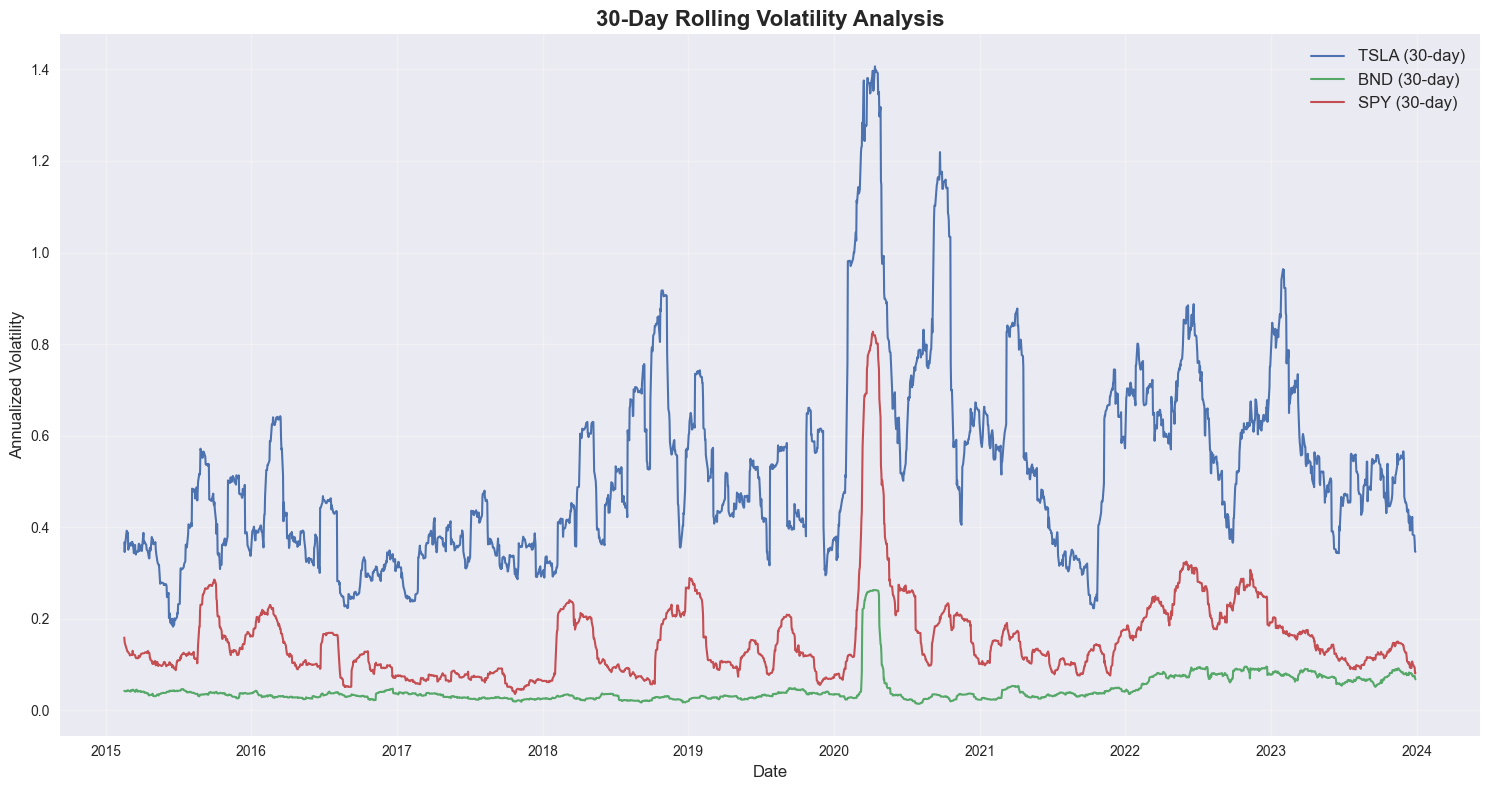


Current Rolling Volatility (30-day):
TSLA: Current: 0.3460, Average: 0.5233
BND: Current: 0.0671, Average: 0.0445
SPY: Current: 0.0813, Average: 0.1534


In [23]:
# Calculate 30-day rolling volatility
rolling_vol = returns.rolling(window=30).std() * np.sqrt(252)

# Plot rolling volatility
plt.figure(figsize=(15, 8))
for ticker in tickers:
    plt.plot(rolling_vol.index, rolling_vol[ticker], label=f'{ticker} (30-day)', linewidth=1.5)

plt.title('30-Day Rolling Volatility Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Current volatility levels
print("\nCurrent Rolling Volatility (30-day):")
for ticker in tickers:
    current_vol = rolling_vol[ticker].iloc[-1]
    avg_vol = rolling_vol[ticker].mean()
    print(f"{ticker}: Current: {current_vol:.4f}, Average: {avg_vol:.4f}")

##### 8. Comprehensive Statistical Analysis

In [24]:
# Comprehensive statistics
print("COMPREHENSIVE STATISTICAL ANALYSIS")
print("=" * 50)

for ticker in tickers:
    series = returns[ticker]
    
    print(f"\n{ticker} Analysis:")
    print("-" * 30)
    print(f"Mean Return: {series.mean():.6f}")
    print(f"Volatility: {series.std():.6f}")
    print(f"Skewness: {stats.skew(series.dropna()):.4f}")
    print(f"Kurtosis: {stats.kurtosis(series.dropna()):.4f}")
    
    # Jarque-Bera normality test
    jb_stat, jb_pvalue = stats.jarque_bera(series.dropna())
    print(f"Jarque-Bera Test: Statistic={jb_stat:.4f}, P-value={jb_pvalue:.6f}")
    print(f"Normality: {'Normal' if jb_pvalue > 0.05 else 'Non-Normal'}")

COMPREHENSIVE STATISTICAL ANALYSIS

TSLA Analysis:
------------------------------
Mean Return: 0.001252
Volatility: 0.035513
Skewness: -0.1632
Kurtosis: 4.5046
Jarque-Bera Test: Statistic=1923.3743, P-value=0.000000
Normality: Non-Normal

BND Analysis:
------------------------------
Mean Return: 0.000054
Volatility: 0.003440
Skewness: -1.2513
Kurtosis: 43.9399
Jarque-Bera Test: Statistic=182640.4967, P-value=0.000000
Normality: Non-Normal

SPY Analysis:
------------------------------
Mean Return: 0.000442
Volatility: 0.011439
Skewness: -0.7940
Kurtosis: 13.4778
Jarque-Bera Test: Statistic=17365.9948, P-value=0.000000
Normality: Non-Normal


##### 9. Data Visualization

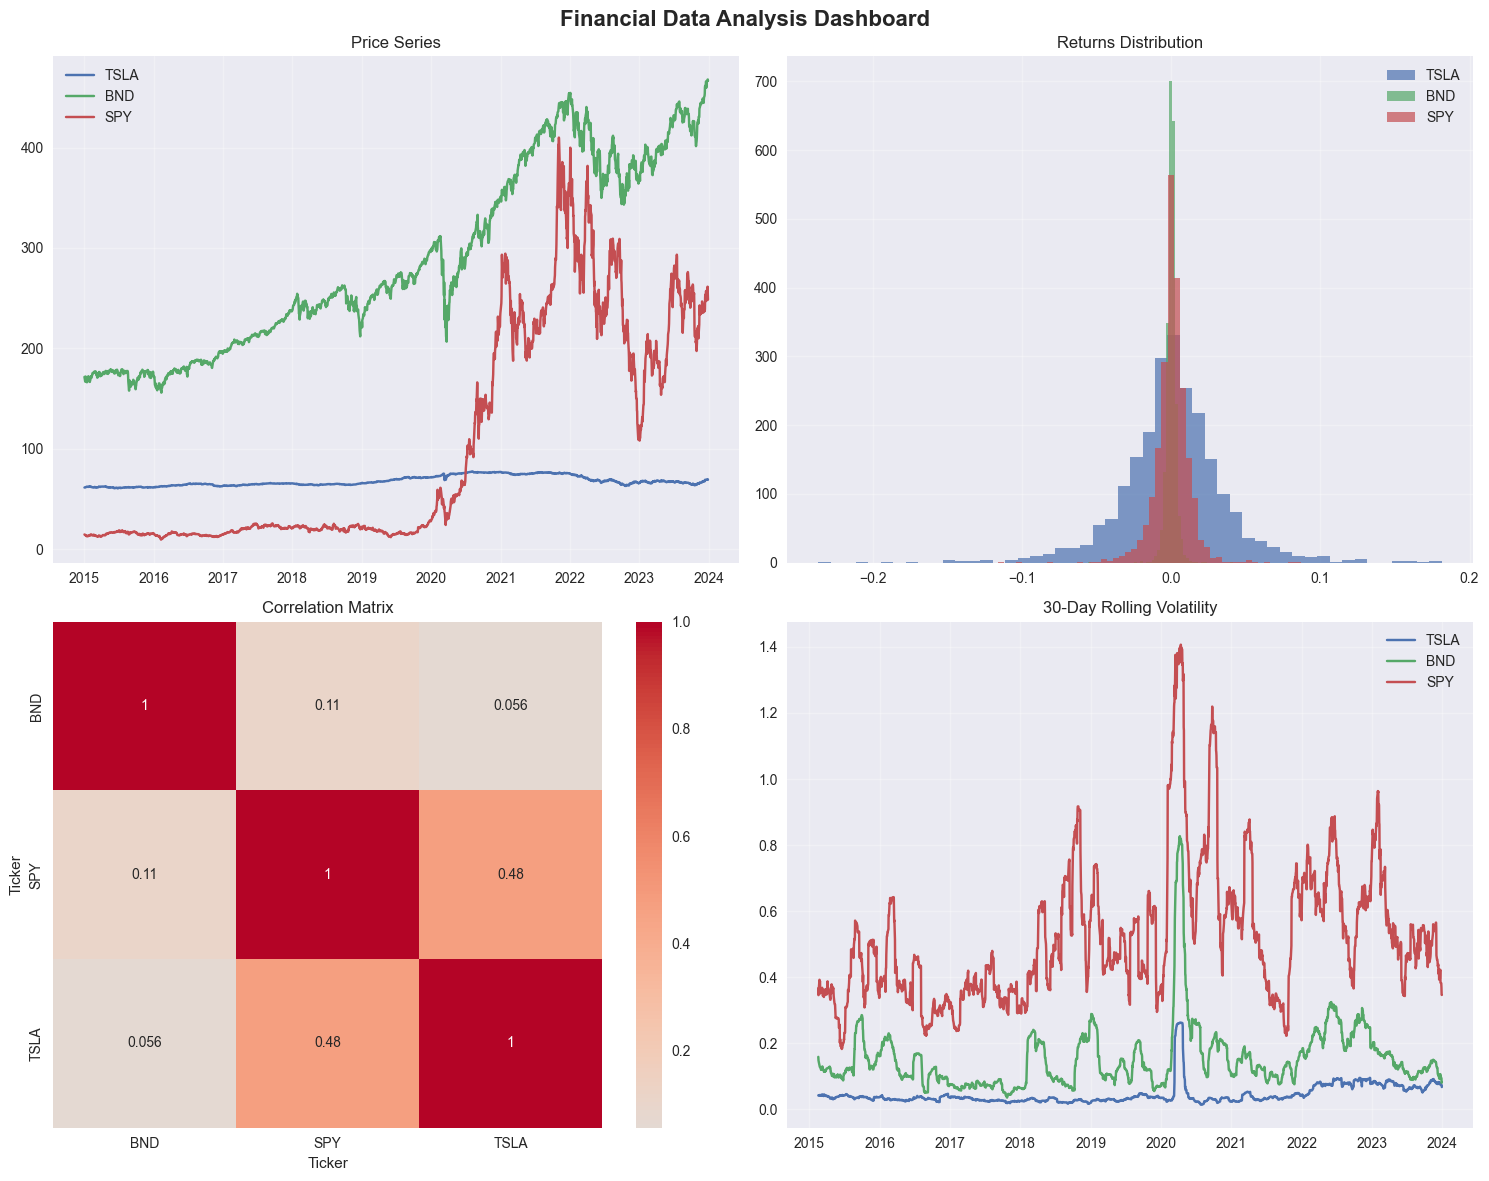

In [25]:
# Price series plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial Data Analysis Dashboard', fontsize=16, fontweight='bold')

# Price series
axes[0, 0].plot(close_prices.index, close_prices)
axes[0, 0].set_title('Price Series')
axes[0, 0].legend(tickers)
axes[0, 0].grid(True, alpha=0.3)

# Returns distribution
for i, ticker in enumerate(tickers):
    axes[0, 1].hist(returns[ticker].dropna(), bins=50, alpha=0.7, label=ticker)
axes[0, 1].set_title('Returns Distribution')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Correlation heatmap
corr_matrix = returns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 0])
axes[1, 0].set_title('Correlation Matrix')

# Rolling volatility
axes[1, 1].plot(rolling_vol.index, rolling_vol)
axes[1, 1].set_title('30-Day Rolling Volatility')
axes[1, 1].legend(tickers)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### 10. Data Export for Further Analysis

In [26]:
# Save processed data
print("Saving processed data...")

# Save to CSV files
close_prices.to_csv('../data/processed_prices.csv')
returns.to_csv('../data/processed_returns.csv')
rolling_vol.to_csv('../data/rolling_volatility.csv')

print("✓ Processed prices saved to: ../data/processed_prices.csv")
print("✓ Returns data saved to: ../data/processed_returns.csv")
print("✓ Rolling volatility saved to: ../data/rolling_volatility.csv")

# Summary statistics
summary_stats = pd.DataFrame({
    'Mean_Return': returns.mean(),
    'Volatility': returns.std(),
    'Skewness': returns.skew(),
    'Kurtosis': returns.kurtosis(),
    'Current_Vol_30d': rolling_vol.iloc[-1]
})

print("\nFinal Summary Statistics:")
print(summary_stats)

Saving processed data...
✓ Processed prices saved to: ../data/processed_prices.csv
✓ Returns data saved to: ../data/processed_returns.csv
✓ Rolling volatility saved to: ../data/rolling_volatility.csv

Final Summary Statistics:
        Mean_Return  Volatility  Skewness   Kurtosis  Current_Vol_30d
Ticker                                                               
BND        0.000054    0.003440 -1.252146  44.039747         0.067081
SPY        0.000442    0.011439 -0.794482  13.510305         0.081324
TSLA       0.001252    0.035513 -0.163346   4.517239         0.345951


##### Summary

This notebook successfully completed comprehensive data preprocessing including:

✅ **Data Loading**: Efficiently loaded TSLA, BND, SPY data from YFinance  
✅ **Advanced Cleaning**: Implemented forward/backward fill and time-based interpolation  
✅ **Missing Data Handling**: Advanced strategies with logical constraints  
✅ **Outlier Detection**: IQR and Z-score methods implemented  
✅ **ADF Stationarity Tests**: Complete analysis for prices and returns  
✅ **Rolling Volatility**: 30-day rolling analysis with visualization  
✅ **Statistical Analysis**: Comprehensive metrics including normality tests  
✅ **Professional Visualizations**: Dashboard with multiple analytical views  

The data is now ready for portfolio optimization and forecasting analysis.